# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [20]:
# your answer here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [4]:
# your answer here
employee = pd.read_csv("data/Employee.csv")
employee.head(2)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [5]:
# Method 1
# your answer here
employee.pivot_table(index=['Department'], values = ['Salary'], aggfunc = {'Salary':'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [6]:
# Method 2
# your answer here
employee.groupby(employee['Department']).agg({'Salary':"mean"})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [7]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values = ['Salary'], aggfunc = {'Salary':'mean'})

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [8]:
# your answer here
employee.pivot_table(index=['Department', 'Title','Years'], values = ['Salary'], aggfunc = {'Salary':'mean'})

Salary
Department Title     Years        
HR         VP        8          70
           analyst   2          30
                     4          35
IT         VP        8          70
           analyst   1          35
                     2          30
           associate 7          60
Sales      associate 2          55
                     3          55

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [12]:
# your answer here
employee.pivot_table(index=['Department', 'Title', 'Name'], values = ['Salary'], aggfunc = {'Salary':'mean', 'Name':'count'})

Name  Salary
Department Title     Name                
HR         VP        Ana        1      70
           analyst   David      1      30
                     Sonia      1      35
IT         VP        Carlos     1      70
           analyst   Jose       1      35
                     Maria      1      30
           associate Pedro      1      60
Sales      associate Eva        1      55
                     Samuel     1      55

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [23]:
# your answer here
print(employee.pivot_table(index=['Department', 'Title'], values = ['Salary'], aggfunc = {'Salary':'min'}))
print(employee.pivot_table(index=['Department', 'Title'], values = ['Salary'], aggfunc = {'Salary':'max'}))
print(employee.pivot_table(index=['Department', 'Title'], values = ['Salary'], aggfunc = {'Salary':'median'}))
print(employee.pivot_table(index=['Department', 'Title'], values = ['Salary'], aggfunc = {'Salary':'median'}))

                      Salary
Department Title            
HR         VP             70
           analyst        30
IT         VP             70
           analyst        30
           associate      60
Sales      associate      55
                      Salary
Department Title            
HR         VP             70
           analyst        35
IT         VP             70
           analyst        35
           associate      60
Sales      associate      55
                      Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0
                      Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0


In [45]:
print(np.std(employee.pivot_table(index=['Department', 'Title'], values = ['Salary'])))

Salary    15.656912
dtype: float64


#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your answer here


# No missing values

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [51]:
# your answer here
print(employee.pivot_table(index='Department', values='Salary', aggfunc='sum'))
employee.pivot_table(index='Department', values='Name', aggfunc='count')
#I could not display both at the same time

            Salary
Department        
HR             135
IT             195
Sales          110


,Name
Department,
HR,3
IT,4
Sales,2


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [70]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values = ['Years','Salary'], aggfunc = {'Years':'sum','Salary':'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [71]:
# your answer here
fitbit = pd.read_csv('data/Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [73]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [78]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [91]:
# your answer here
from sklearn import linear_model
corrr = fitbit[['Minutes Very Active','Steps']]
corrr.corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

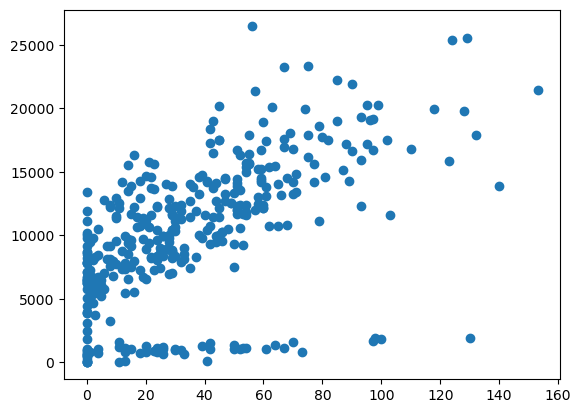

In [94]:
# your answer here
import matplotlib.pyplot as plt 
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [95]:
# your answer here

#More minutes very active more steps, we can see a correlation on the scatter

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

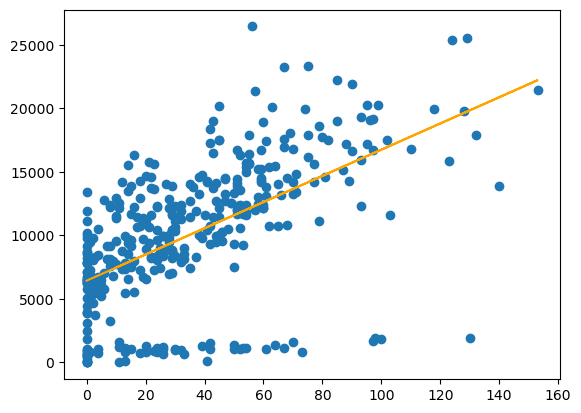

In [98]:
# your answer here
x = fitbit[['Minutes Very Active']]
y = fitbit['Steps']
model = linear_model.LinearRegression()
result = model.fit(x,y)
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c= 'orange')
plt.scatter(x,y)
plt.show()

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

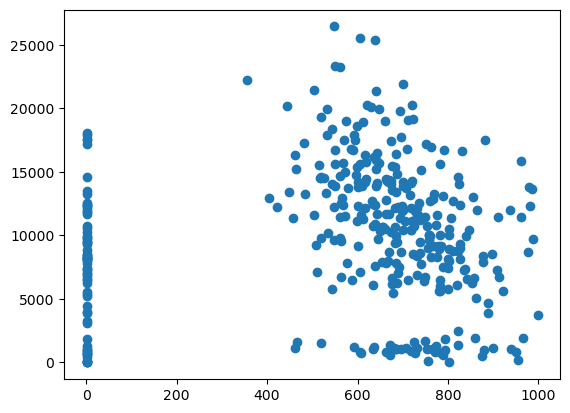

In [100]:
# your answer here
x = fitbit[['Minutes Sedentary']]
y = fitbit['Steps']
plt.scatter(x,y)
#There is a correleation, bigger x means lower y

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

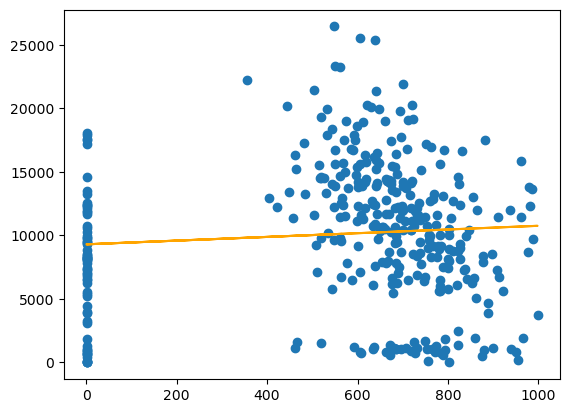

In [101]:
# your answer here
model = linear_model.LinearRegression()
result = model.fit(x,y)
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c= 'orange')
plt.scatter(x,y)
plt.show()

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

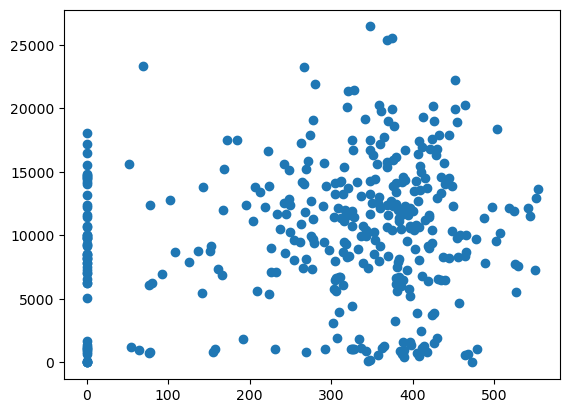

In [103]:
# your answer here
x = fitbit[['MinutesOfSleep']]
y = fitbit['Steps']
plt.scatter(x,y)
#It doesnt seem to exist a correlation between these 2 variables

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [107]:
# your answer here
column= fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
cor_fit = column.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [ ]:
# your answer here
# 1st - Min Very Active
# 2nd - floors

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [113]:
# your answer here
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades.head(2)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7


#### Show visually the frequency distribution of the time_grades dataset.

(array([[2., 2., 2., 2., 2., 2., 2., 1., 0., 0.],
        [0., 2., 2., 3., 2., 2., 2., 0., 0., 2.],
        [1., 3., 2., 4., 5., 0., 0., 0., 0., 0.]]),
 array([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0],
       dtype=object),
 <a list of 3 BarContainer objects>)

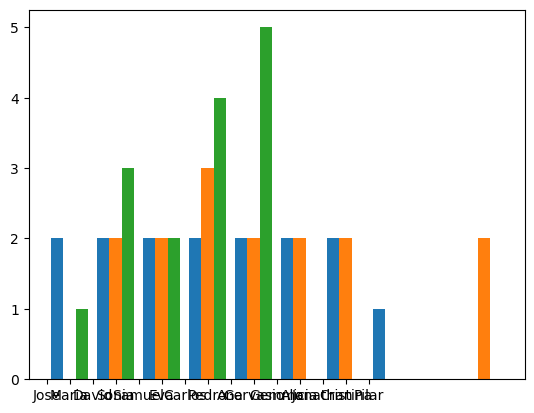

In [167]:
# your answer here
x = time_grades[['Grade']]
y = time_grades[['Study time']]
plt.hist(time_grades)

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [163]:
# your answer here
from scipy import stats
x = np.array(x).reshape(-1)
y = np.array(y).reshape(-1)
stats.pearsonr(x, y)

PearsonRResult(statistic=0.7980456073578857, pvalue=0.0003627635256342742)

In [173]:
stats.spearmanr(x, y)[0]

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

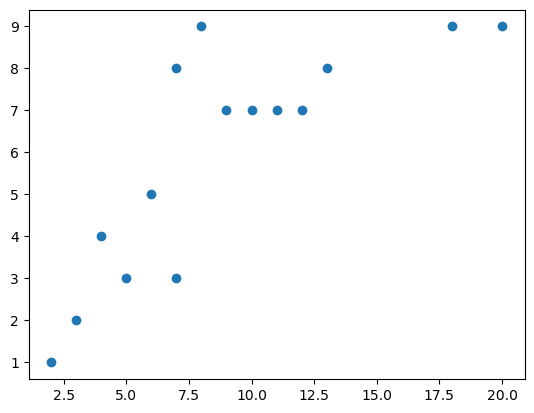

In [172]:
# your answer here
plt.scatter(time_grades['Study time'], time_grades['Grade'])

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [174]:
# your answer here
# There is a correlation. More time spent studying higher is the grade